In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,power_transform,PowerTransformer,OrdinalEncoder,StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.decomposition import PCA
from datetime import datetime

In [143]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [144]:
#checking shape
df.shape

(1000, 40)

There are around 1000 rows and 40 columns including target variable.

In [145]:
#checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [146]:
#checking data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [147]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 have null values

In [148]:
#Lets drop _c39 because there are total null values in  column.
df.drop('_c39',axis = 1, inplace = True)

In [149]:
#checking data after droping a column.
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Categorical Columns

In [150]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [151]:
df_cat=df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_year','auto_model','fraud_reported']].copy()

In [152]:
df_cat.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_year,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,2004,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,2007,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,2007,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,2014,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,2009,RSX,N


In [153]:
df['incident_location'].nunique()

1000

Here we see that incident_location have 1000 unique values and they are no use to predict target variable. Lets drop incident_location column.

In [154]:
df['auto_model'].nunique()

39

auto model has 39 unique values.

In [155]:
#Dropping incident_location column
df_cat.drop(['incident_location','auto_model'],axis = 1, inplace = True)

In [156]:
#Cheking shape of new nominal dataframe
df_cat.shape

(1000, 18)

As some columns have "?" value

In [157]:
#we can see ? symbol in  1:4 ratio in this column
df_cat.	collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [158]:
#we can see ? symbol in  1:3 ratio in this column
df_cat.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [159]:
#we can see ? symbol in  1:3 ratio in this column
df_cat.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [160]:
column_with_question_mark_symbol = ['police_report_available','collision_type','property_damage']

In [161]:
#lets replace '?' with nan values
for i in range(len(column_with_question_mark_symbol)):
    df_cat[column_with_question_mark_symbol[i]].replace('?',np.nan,inplace= True)

In [162]:
for i in column_with_question_mark_symbol:
    print(i, df_cat[i].isnull().sum())

police_report_available 343
collision_type 178
property_damage 360


Lets remove NaN values in each column.

In [163]:
df_cat.isnull().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
auto_year                    0
fraud_reported               0
dtype: int64

In [164]:
df_cat['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [165]:
df_cat['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [166]:
df_cat['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [167]:
#removing NaN using mode in each column
df_cat['police_report_available'] = df_cat['police_report_available'].fillna ('NO')
df_cat['collision_type'] = df_cat['collision_type'].fillna ('Rear Collision')
df_cat['property_damage'] = df_cat['property_damage'].fillna ('NO')

In [168]:
for i in column_with_question_mark_symbol:
    print(i,df_cat[i].value_counts())

police_report_available NO     686
YES    314
Name: police_report_available, dtype: int64
collision_type Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
property_damage NO     698
YES    302
Name: property_damage, dtype: int64


Categorical columns Graphical Representation

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

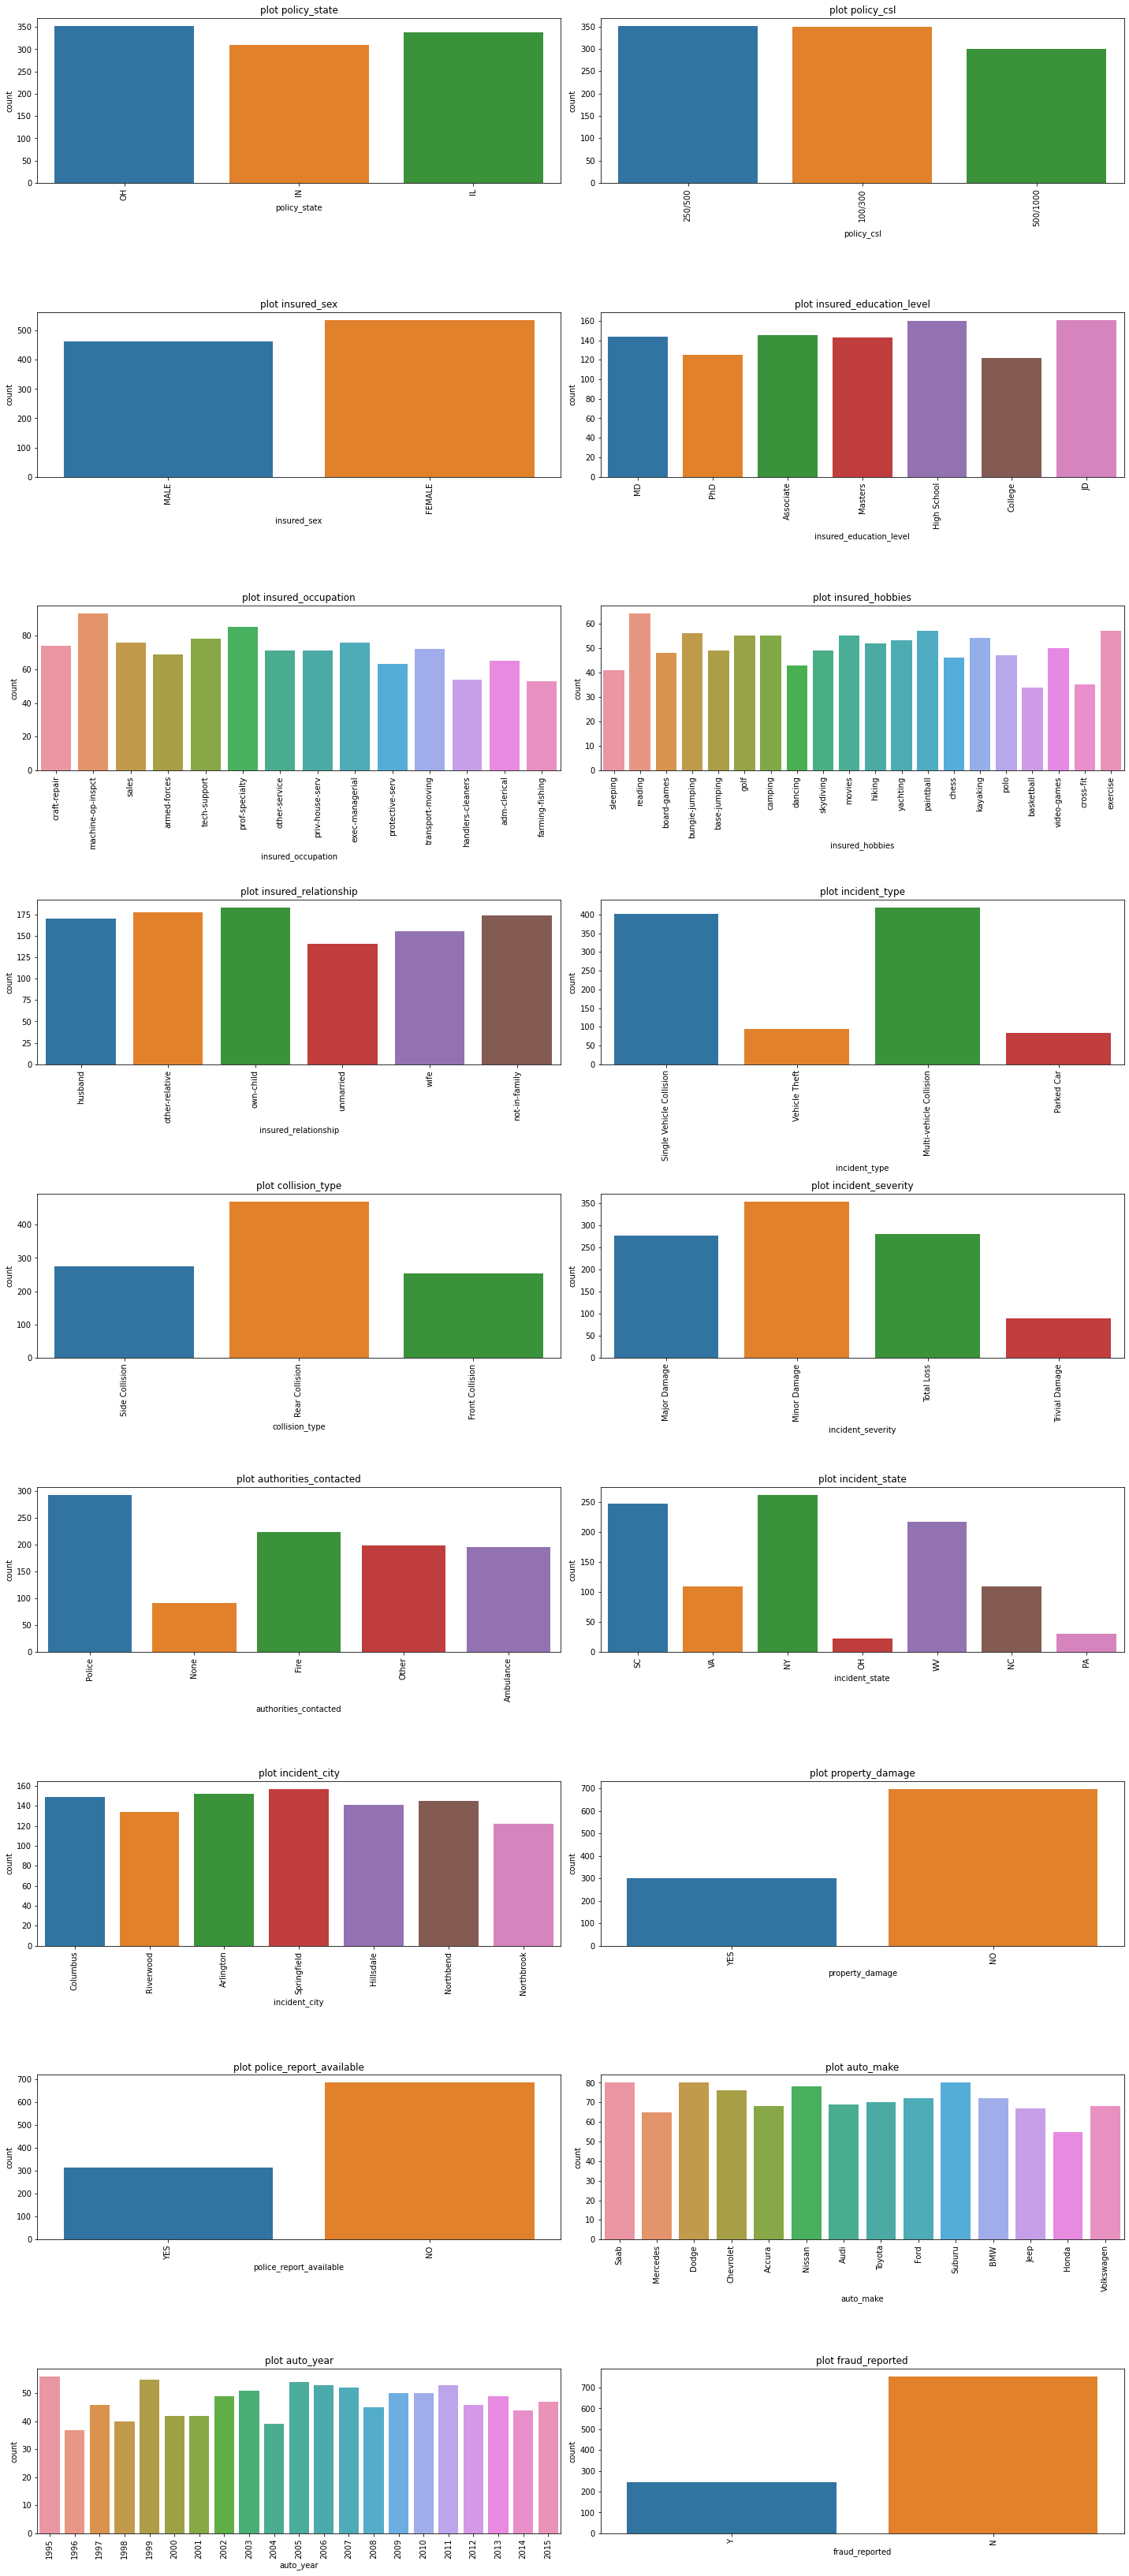

In [169]:
ncol,nrow=10,2
ab=df_cat.columns.values
plt.figure(figsize=(20,50))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.countplot(df_cat[i])
    plt.title(f"plot {i}")
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

Numerical Columns

In [170]:
df_cont=df[['months_as_customer', 'age','policy_number','policy_deductable','policy_annual_premium','policy_bind_date', 'umbrella_limit','insured_zip','capital-gains', 'capital-loss','incident_date','incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries','witnesses', 'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim']].copy()


In [171]:
df_cont.head()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,policy_bind_date,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,521585,1000,1406.91,17-10-2014,0,466132,53300,0,25-01-2015,5,1,1,2,71610,6510,13020,52080
1,228,42,342868,2000,1197.22,27-06-2006,5000000,468176,0,0,21-01-2015,8,1,0,0,5070,780,780,3510
2,134,29,687698,2000,1413.14,06-09-2000,5000000,430632,35100,0,22-02-2015,7,3,2,3,34650,7700,3850,23100
3,256,41,227811,2000,1415.74,25-05-1990,6000000,608117,48900,-62400,10-01-2015,5,1,1,2,63400,6340,6340,50720
4,228,44,367455,1000,1583.91,06-06-2014,6000000,610706,66000,-46000,17-02-2015,20,1,0,1,6500,1300,650,4550


In [172]:
df_cont.shape

(1000, 19)

In [173]:
df_cont['policy_number'].nunique()

1000

In [174]:
df_cont.drop('policy_number',axis = 1, inplace = True)

In [175]:
#coverting policy_bind_date column to date
df_cont['policy_bind_date'] = pd.to_datetime(df_cont['policy_bind_date'],format= '%d-%m-%Y')

In [176]:
#coverting incident_date column to date
df_cont['incident_date'] = pd.to_datetime(df_cont['incident_date'],format= '%d-%m-%Y')

In [177]:
#Lets create new column which is days between policy bind and incident date
df_cont['days_bw_policybind_and_incident'] = df_cont['incident_date'] - df_cont['policy_bind_date']

In [178]:
#lets see all three columns
df_cont.loc[:,['incident_date','policy_bind_date','days_bw_policybind_and_incident']]

,incident_date,policy_bind_date,days_bw_policybind_and_incident
0,2015-01-25,2014-10-17,100 days
1,2015-01-21,2006-06-27,3130 days
2,2015-02-22,2000-09-06,5282 days
3,2015-01-10,1990-05-25,8996 days
4,2015-02-17,2014-06-06,256 days
...,...,...,...
995,2015-02-22,1991-07-16,8622 days
996,2015-01-24,2014-01-05,384 days
997,2015-01-23,2003-02-17,4358 days
998,2015-02-26,2011-11-18,1196 days


In [179]:
#lets extract the numerical information form this column
for i in range(len(df_cont.days_bw_policybind_and_incident)):
    df_cont['days_bw_policybind_and_incident'][i] = df_cont['days_bw_policybind_and_incident'][i].days

<ipython-input-179-ce57a031e223>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['days_bw_policybind_and_incident'][i] = df_cont['days_bw_policybind_and_incident'][i].days


In [180]:
#converting it into float
df_cont['days_bw_policybind_and_incident'] = df_cont['days_bw_policybind_and_incident'].astype(float)

In [181]:
df_cont['days_bw_policybind_and_incident'].dtype

dtype('float64')

In [182]:
df_cont.days_bw_policybind_and_incident.head()

0     100.0
1    3130.0
2    5282.0
3    8996.0
4     256.0
Name: days_bw_policybind_and_incident, dtype: float64

In [183]:
df_cont.drop(['policy_bind_date','incident_date'],axis = 1, inplace = True)

In [184]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Here 80% values are zero and lets drop this column.

In [185]:
df['insured_zip'].value_counts()

469429    2
446895    2
431202    2
456602    2
477695    2
         ..
445120    1
608963    1
449221    1
467654    1
448722    1
Name: insured_zip, Length: 995, dtype: int64

Here 995 out of 1000 are unique values so lets drop this column.

In [186]:
#lets drop umbrella_limit,insured_zip columns
df_cont.drop(['umbrella_limit','insured_zip'],axis = 1,inplace = True)

In [187]:
df_cont.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,328,48,1000,1406.91,53300,0,5,1,1,2,71610,6510,13020,52080,100.0
1,228,42,2000,1197.22,0,0,8,1,0,0,5070,780,780,3510,3130.0
2,134,29,2000,1413.14,35100,0,7,3,2,3,34650,7700,3850,23100,5282.0
3,256,41,2000,1415.74,48900,-62400,5,1,1,2,63400,6340,6340,50720,8996.0
4,228,44,1000,1583.91,66000,-46000,20,1,0,1,6500,1300,650,4550,256.0


In [188]:
#checking unique values
int_to_object =['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(df_cont[i].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


In [189]:
#we can see that these columns consists of 3 and 4 unique values, lets covert it into onject datatypes
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    df_cont[i] = df_cont[i].astype('object')

In [190]:
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(i,df_cont[i].dtype)

number_of_vehicles_involved object
bodily_injuries object
witnesses object


In [191]:
df_cont.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'days_bw_policybind_and_incident'],
      dtype='object')

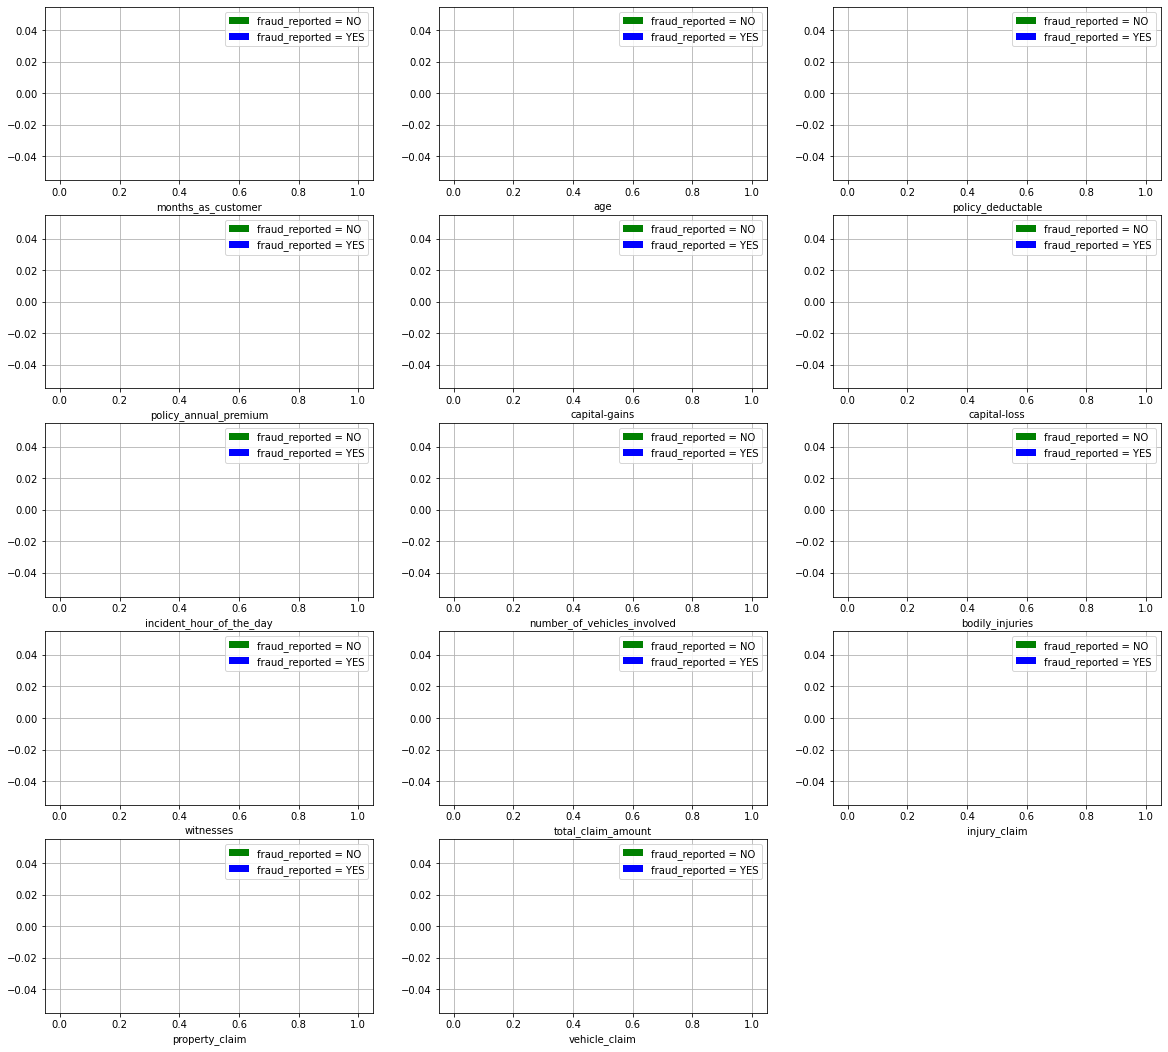

In [192]:
plt.figure(figsize=(20, 30))
numerical_columns=['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim']
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 3, i)
    df[df["fraud_reported"] == 0][column].hist(bins=35, color='green', label='fraud_reported = NO', alpha=1)
    df[df["fraud_reported"] == 1][column].hist(bins=35, color='blue', label='fraud_reported = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

In [193]:
df_cont.dtypes

months_as_customer                   int64
age                                  int64
policy_deductable                    int64
policy_annual_premium              float64
capital-gains                        int64
capital-loss                         int64
incident_hour_of_the_day             int64
number_of_vehicles_involved         object
bodily_injuries                     object
witnesses                           object
total_claim_amount                   int64
injury_claim                         int64
property_claim                       int64
vehicle_claim                        int64
days_bw_policybind_and_incident    float64
dtype: object

In [194]:
df_cont.nunique()

months_as_customer                 391
age                                 46
policy_deductable                    3
policy_annual_premium              991
capital-gains                      338
capital-loss                       354
incident_hour_of_the_day            24
number_of_vehicles_involved          4
bodily_injuries                      3
witnesses                            4
total_claim_amount                 763
injury_claim                       638
property_claim                     626
vehicle_claim                      726
days_bw_policybind_and_incident    953
dtype: int64

Checking Outliers using Boxplot

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x`

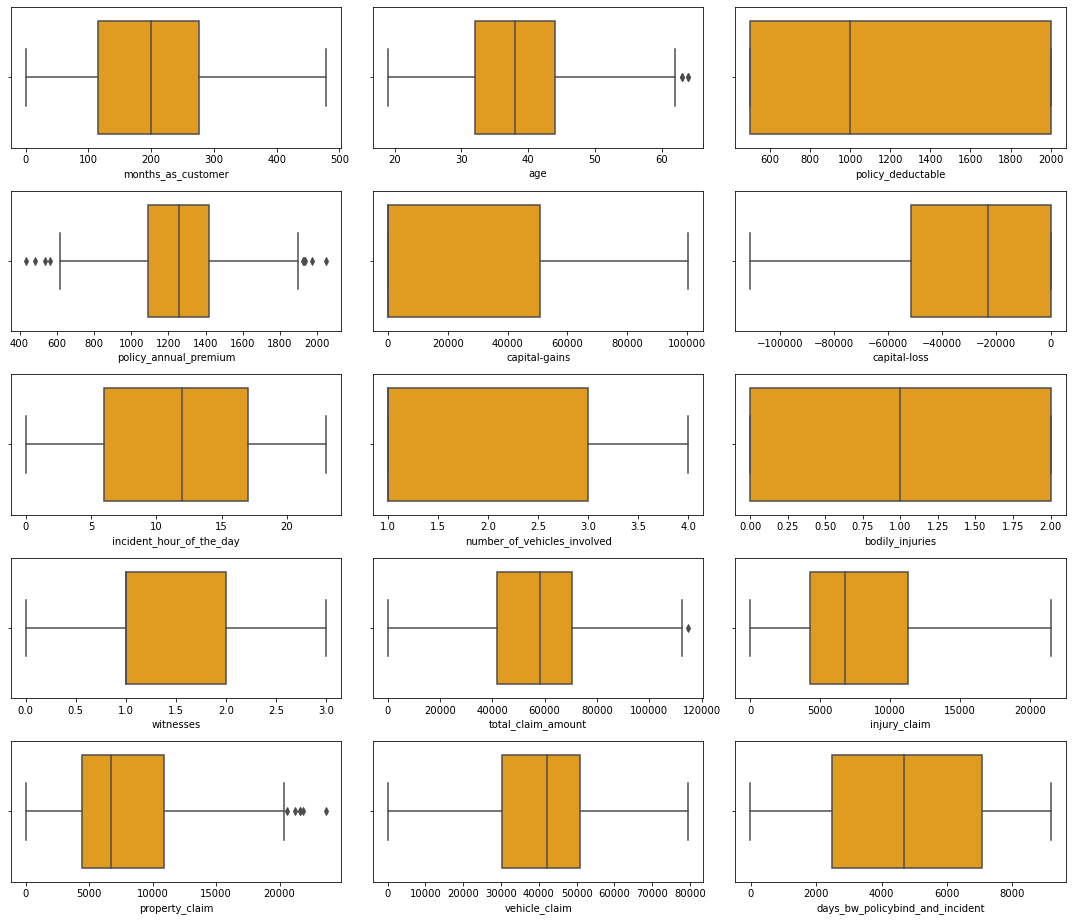

In [195]:
collist = df_cont.columns
ncol = 3
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_cont[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

Removing Outliers

In [196]:
Numerical_columns = ['age','policy_annual_premium','total_claim_amount','property_claim',]

In [197]:
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df_cont.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df_cont.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [198]:
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df_cont.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df_cont.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [199]:
for i in Numerical_columns:
    outliers_IQR3(df_cont,i)

Outlies are removed now 

Checking Skewness

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

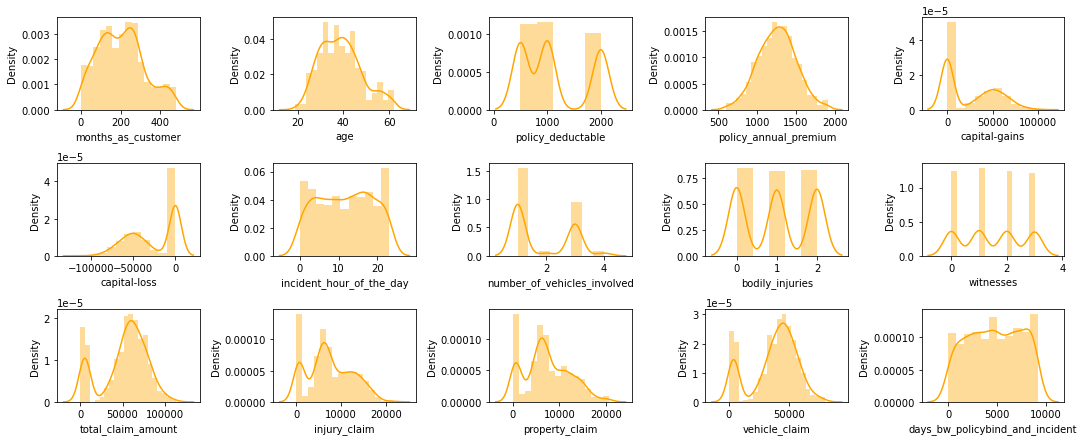

In [200]:
collist = df_cont.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_cont[collist[i]],color='orange')
    plt.tight_layout()

As we see above outlier removal columns are normaly distributed.

Skewness Reduction

In [201]:
for i in df_cont:
    if (df_cont[i].skew() > 0.5 ) or (df_cont[i].skew() < -0.5) :
        print(i, df_cont[i].skew())

number_of_vehicles_involved 0.502664087487584
total_claim_amount -0.5953507359843401
vehicle_claim -0.6210979312228687


In [202]:
#As we have only 3 numericals columns are having skewness but number_of_vehicles_involved is almost 5 
#Im removeing skewness for total_claim_amount and vehicle_claim
#which are not very close to skewness range -0.5 to +0.5
#lets remove the skewness of these columns
df_cont['total_claim_amount'] = power_transform(df_cont['total_claim_amount'].values.reshape(-1,1))
df_cont['vehicle_claim'] = power_transform(df_cont['vehicle_claim'].values.reshape(-1,1))

Concat the Categorical and Numerical columns

In [203]:
df_new=pd.concat([df_cat,df_cont],axis=1)

In [204]:
df_new

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,0,5,1,1,2,0.715849,6510,13020.0,0.753697,100.0
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,...,0,8,1,0,0,-1.776997,780,780.0,-1.786629,3130.0
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,0,7,3,2,3,-0.716996,7700,3850.0,-0.820881,5282.0
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,-62400,5,1,1,2,0.391464,6340,6340.0,0.677602,8996.0
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,...,-46000,20,1,0,1,-1.729844,1300,650.0,-1.740038,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,...,0,20,1,0,1,1.339185,17440,8720.0,1.259186,8622.0
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,...,0,23,1,2,3,2.203171,18080,18080.0,1.904757,384.0
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,...,0,4,3,2,3,0.553096,7500,7500.0,0.777232,4358.0
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,...,0,2,1,0,1,-0.247630,5220,5220.0,-0.104258,1196.0


In [205]:
df_new.shape

(1000, 33)

After Implementing EDA we have 1000 rows and 33 columns

In [206]:
df_new.dtypes

policy_state                        object
policy_csl                          object
insured_sex                         object
insured_education_level             object
insured_occupation                  object
insured_hobbies                     object
insured_relationship                object
incident_type                       object
collision_type                      object
incident_severity                   object
authorities_contacted               object
incident_state                      object
incident_city                       object
property_damage                     object
police_report_available             object
auto_make                           object
auto_year                            int64
fraud_reported                      object
months_as_customer                   int64
age                                float64
policy_deductable                    int64
policy_annual_premium              float64
capital-gains                        int64
capital-los

In [207]:
df_new.describe()

,auto_year,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,2005.103000,203.954000,38.942000,1136.000000,1256.506126,25126.100000,-26793.700000,11.644000,-1.967315e-16,7433.420000,7392.360000,2.216005e-16,4739.140000
std,6.015861,115.113174,9.124576,611.864673,242.246335,27872.187708,28104.096686,6.951373,1.000500e+00,4880.951853,4803.547892,1.000500e+00,2686.430702
min,1995.000000,0.000000,19.000000,500.000000,600.476250,0.000000,-111100.000000,0.000000,-1.928968e+00,0.000000,0.000000,-1.927542e+00,-20.000000
25%,2000.000000,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,-4.456059e-01,4295.000000,4445.000000,-4.408923e-01,2484.000000
50%,2005.000000,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.819109e-01,6775.000000,6750.000000,1.996285e-01,4682.000000
75%,2010.000000,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,6.754915e-01,11305.000000,10885.000000,6.833312e-01,7068.000000
max,2015.000000,479.000000,62.000000,2000.000000,1904.826250,100500.000000,0.000000,23.000000,2.419691e+00,21450.000000,20545.000000,2.323867e+00,9172.000000


difference between 75th percentile and max is not much
Standard Deviation is also very less for all the columns expect target variable , Means the data is less spreaded
Mean and median is almost same for every column, so the data almost normal distibuted.There are no null values in any columns

Correlation

In [208]:
df_new.corr()

,auto_year,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
auto_year,1.000000,-0.000292,0.001513,0.026105,-0.046996,0.031398,-0.056615,0.021368,-0.035807,-0.013718,-0.013521,-0.042947,-0.014188
months_as_customer,-0.000292,1.000000,0.922143,0.026807,0.003913,0.006399,0.020209,0.070639,0.062404,0.065329,0.037080,0.061308,0.047927
age,0.001513,0.922143,1.000000,0.029832,0.013780,-0.007150,0.006753,0.087278,0.070653,0.075887,0.062858,0.063059,0.037033
policy_deductable,0.026105,0.026807,0.029832,1.000000,-0.003331,0.035212,-0.023544,0.060935,0.023288,0.039107,0.065553,0.004875,0.050396
policy_annual_premium,-0.046996,0.003913,0.013780,-0.003331,1.000000,-0.012984,0.024453,-0.001393,0.006227,-0.019397,-0.011577,0.017740,-0.001160
capital-gains,0.031398,0.006399,-0.007150,0.035212,-0.012984,1.000000,-0.046904,-0.016406,0.015251,0.025934,-0.001322,0.014891,-0.042226
capital-loss,-0.056615,0.020209,0.006753,-0.023544,0.024453,-0.046904,1.000000,-0.025054,-0.036660,-0.046060,-0.023274,-0.033303,0.027647
incident_hour_of_the_day,0.021368,0.070639,0.087278,0.060935,-0.001393,-0.016406,-0.025054,1.000000,0.214263,0.165768,0.179720,0.211365,-0.035873
total_claim_amount,-0.035807,0.062404,0.070653,0.023288,0.006227,0.015251,-0.036660,0.214263,1.000000,0.806390,0.813873,0.981220,0.000824
injury_claim,-0.013718,0.065329,0.075887,0.039107,-0.019397,0.025934,-0.046060,0.165768,0.806390,1.000000,0.565837,0.720711,-0.002487


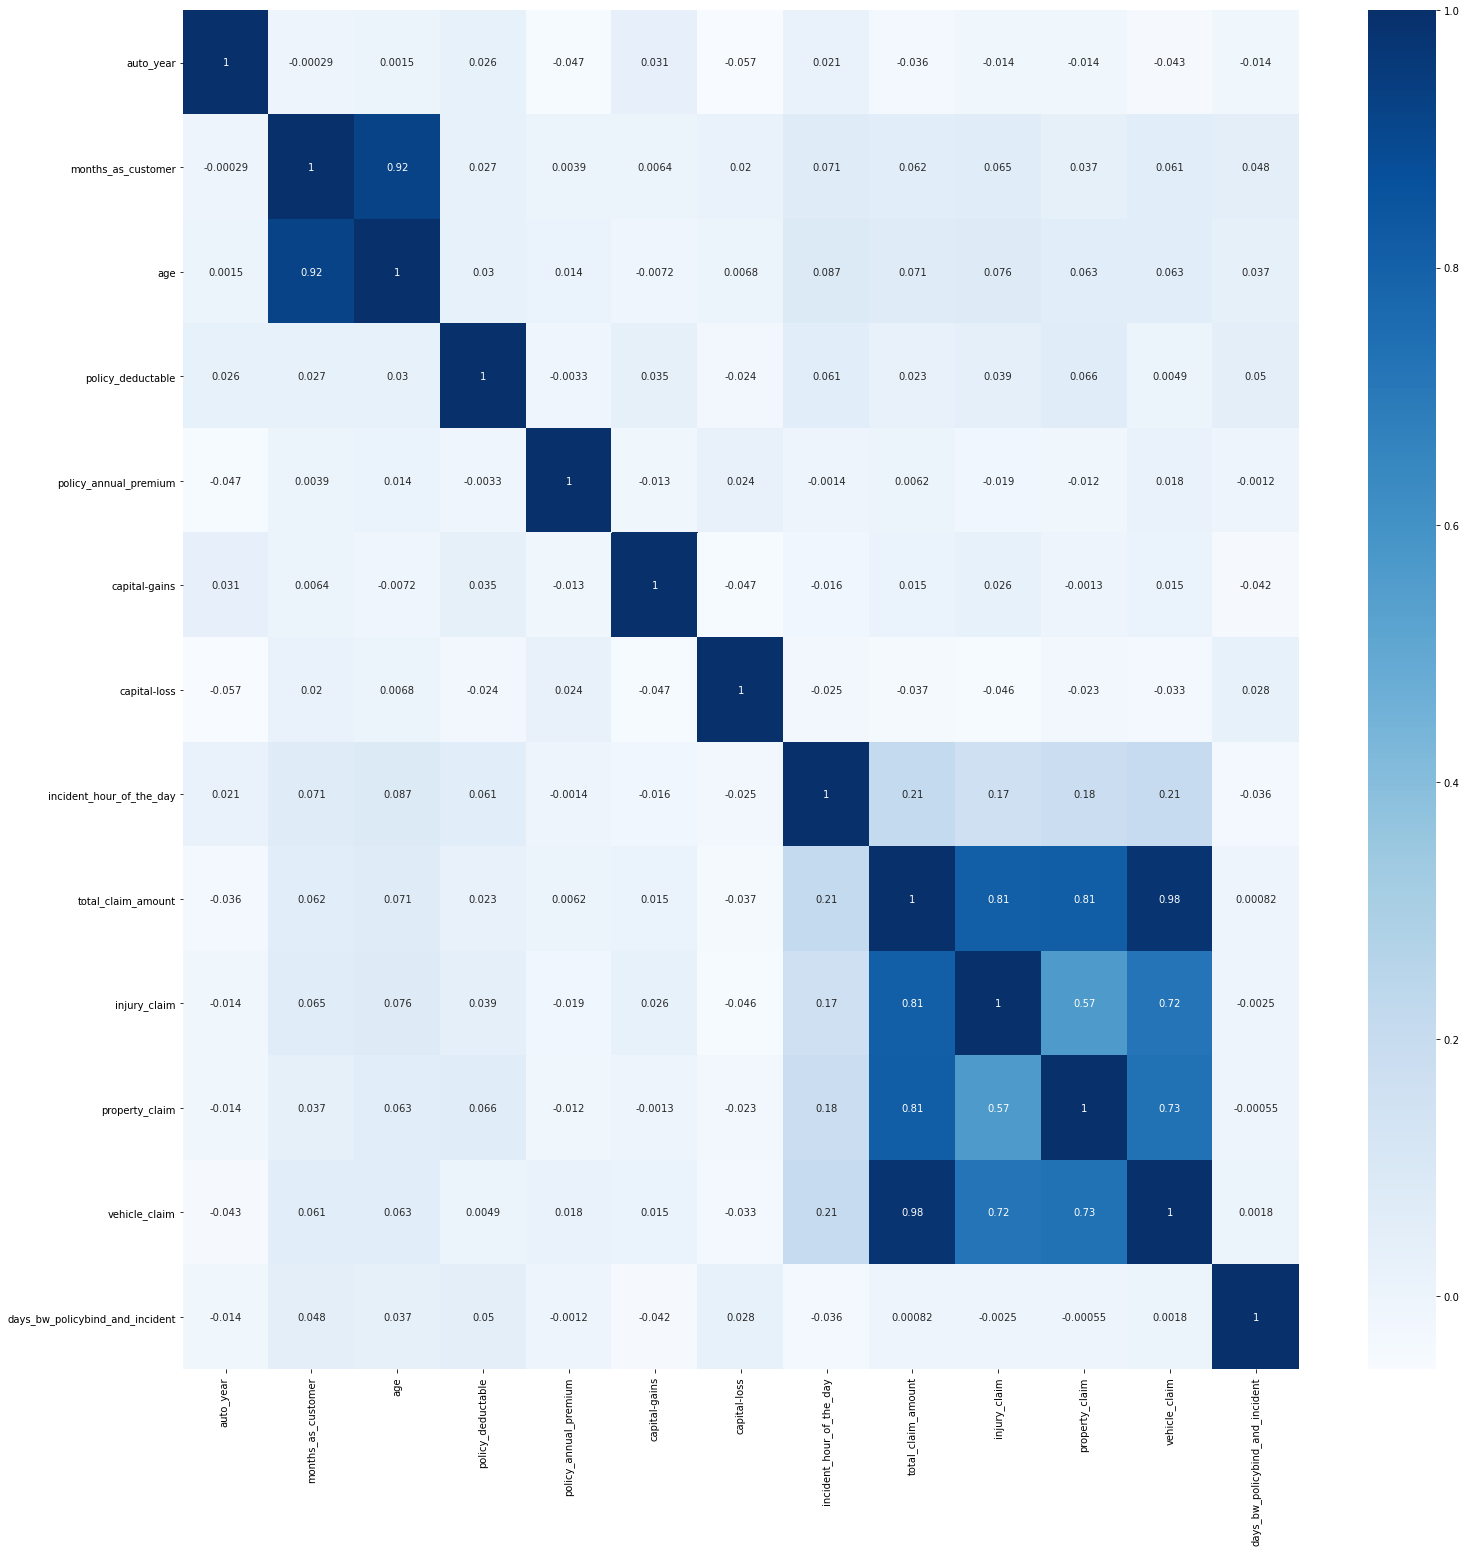

In [209]:
fig = plt.figure(figsize=(25,25))
cor_matrix = df_new.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

Encoding Categorical columns

In [210]:
for i in df_new.columns:
    if  (df_new[i].dtypes == 'object') and (len(df_new[i].unique()) == 2):
        print(i)

insured_sex
property_damage
police_report_available
fraud_reported


In [211]:
o_encoding = OrdinalEncoder()
for i in df_new.columns:
    if (df_new[i].dtypes == 'object') and (len(df_new[i].unique()) == 2):
        df_new[i] = o_encoding.fit_transform(df_new[i].values.reshape(-1,1))

In [212]:
one_hot_columns = []
for i in df_new.columns:
    if df_new[i].dtype == 'object':
        print(i,len(pd.unique(df_new[i])))
        one_hot_columns.append(i)

policy_state 3
policy_csl 3
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
auto_make 14
number_of_vehicles_involved 4
bodily_injuries 3
witnesses 4


In [213]:
df_new.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,OH,250/500,1.0,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,0,5,1,1,2,0.715849,6510,13020.0,0.753697,100.0
1,IN,250/500,1.0,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,...,0,8,1,0,0,-1.776997,780,780.0,-1.786629,3130.0
2,OH,100/300,0.0,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,0,7,3,2,3,-0.716996,7700,3850.0,-0.820881,5282.0
3,IL,250/500,0.0,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,-62400,5,1,1,2,0.391464,6340,6340.0,0.677602,8996.0
4,IL,500/1000,1.0,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,...,-46000,20,1,0,1,-1.729844,1300,650.0,-1.740038,256.0


In [214]:
#we well going to convert the above columns one-hot encoder
#and also columns contains more than 2 unique values

df = pd.get_dummies(data = df_new,columns=one_hot_columns)

In [215]:
df.shape

(1000, 125)

In [216]:
df.head()

,insured_sex,property_damage,police_report_available,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,...,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3
0,1.0,1.0,1.0,2004,1.0,328,48.0,1000,1406.91,53300,...,0,0,0,0,1,0,0,0,1,0
1,1.0,0.0,0.0,2007,1.0,228,42.0,2000,1197.22,0,...,0,0,0,1,0,0,1,0,0,0
2,0.0,0.0,0.0,2007,0.0,134,29.0,2000,1413.14,35100,...,0,1,0,0,0,1,0,0,0,1
3,0.0,0.0,0.0,2014,1.0,256,41.0,2000,1415.74,48900,...,0,0,0,0,1,0,0,0,1,0
4,1.0,0.0,0.0,2009,0.0,228,44.0,1000,1583.91,66000,...,0,0,0,1,0,0,0,1,0,0


Splitting the Dateset into X and Y

In [217]:
x = df.drop('fraud_reported',axis = 1)
Y = df['fraud_reported']

Data Scaling

In [218]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(x),columns= x.columns)
scaled_X.head()

,insured_sex,property_damage,police_report_available,auto_year,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,...,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3
0,1.076953,1.520282,1.478078,-0.183440,1.078140,0.993200,-0.222383,0.621182,1.011331,0.953851,...,-0.175863,-0.746748,-0.178862,-0.717741,1.431356,-0.704987,-0.575811,-0.589668,1.732051,-0.566572
1,1.076953,-0.657773,-0.676554,0.315491,0.208995,0.335307,1.412784,-0.244857,-0.901927,0.953851,...,-0.175863,-0.746748,-0.178862,1.393261,-0.698638,-0.704987,1.736682,-0.589668,-0.577350,-0.566572
2,-0.928546,-0.657773,-0.676554,0.315491,-0.608002,-1.090130,1.412784,0.646913,0.358023,0.953851,...,-0.175863,1.339140,-0.178862,-0.717741,-0.698638,1.418467,-0.575811,-0.589668,-0.577350,1.765000
3,-0.928546,-0.657773,-0.676554,1.479664,0.452355,0.225658,1.412784,0.657651,0.853388,-1.267577,...,-0.175863,-0.746748,-0.178862,-0.717741,1.431356,-0.704987,-0.575811,-0.589668,1.732051,-0.566572
4,1.076953,-0.657773,-0.676554,0.648112,0.208995,0.554604,-0.222383,1.352209,1.467210,-0.683741,...,-0.175863,-0.746748,-0.178862,1.393261,-0.698638,-0.704987,-0.575811,1.695868,-0.577350,-0.566572


Principal Component Analysis

In [219]:
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [220]:
#checking cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score

array([  5.184245  ,   7.93542839,   9.69821241,  11.28703396,
        12.83249083,  14.37294544,  15.85755251,  17.31900335,
        18.76322385,  20.18691687,  21.59496331,  22.97886028,
        24.3314288 ,  25.67381493,  27.00931928,  28.31031974,
        29.5893658 ,  30.85802504,  32.11820588,  33.35115312,
        34.57690731,  35.77695318,  36.96775737,  38.1508958 ,
        39.31933331,  40.47204075,  41.60805068,  42.73471573,
        43.85155399,  44.95830474,  46.05327081,  47.14011764,
        48.20682182,  49.26506894,  50.31556574,  51.36006494,
        52.3822335 ,  53.39307157,  54.39311966,  55.38753052,
        56.37303294,  57.3447702 ,  58.29926921,  59.25109738,
        60.20100168,  61.13342762,  62.04918744,  62.95278394,
        63.84584612,  64.73605077,  65.61907068,  66.49425287,
        67.35103893,  68.20297312,  69.04376124,  69.87882262,
        70.70956824,  71.52979004,  72.3488026 ,  73.15540792,
        73.95417998,  74.75002431,  75.53150607,  76.30

In [221]:
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 92


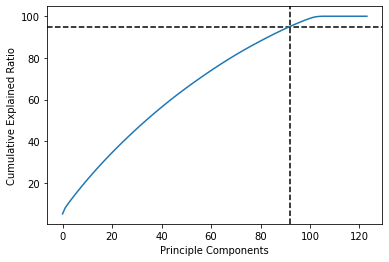

In [222]:
#plotting the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 95, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

As shown in above plot we can see that for 92 columns 95% of data will be retrived.

In [223]:
Final_pca = PCA(n_components= 92)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [224]:
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-1.244592,1.679353,0.675451,2.835910,0.154514,-1.463733,2.302956,0.614649,0.112490,-1.560510,...,0.996724,0.397176,0.446349,0.260817,0.410797,-0.697239,1.383806,0.926328,0.907149,1.118022
1,4.207381,-0.071948,1.331833,-0.798711,0.151100,-0.472028,-0.783472,0.164124,-1.916597,1.923403,...,-0.672081,-0.229907,-2.062909,-0.166249,-0.534158,2.035802,-0.889090,1.236111,-0.900334,-0.165174
2,0.496125,-2.579044,0.185284,0.330640,-0.377628,-0.449071,0.123182,-0.743235,-1.236469,-0.596183,...,-0.045162,-0.105363,-1.415487,0.441950,0.683613,0.322319,-0.667227,-0.520255,0.420932,0.240235
3,-0.223684,1.641987,0.909331,0.190855,-2.201268,-2.246515,2.550220,-0.364414,0.763736,-1.813223,...,1.032948,-0.136903,0.114619,0.337807,-0.226050,0.615841,0.570601,-0.143104,0.947334,-0.077472
4,4.763655,-0.409458,1.784468,-0.482321,-1.337536,0.752114,0.218788,1.343097,-1.450660,1.737943,...,1.909239,-1.067892,-0.741622,0.021875,0.002581,-1.007135,-0.986372,-0.455720,1.962241,-0.579657


In [225]:
Y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [226]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(pca_x, Y)

y_sm.value_counts()

0.0    753
1.0    753
Name: fraud_reported, dtype: int64

RAndom State

In [227]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.30,random_state=i,stratify= y_sm)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8805309734513275 n Random_state 10


Model

In [228]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.33,random_state= 115, stratify= y_sm )

In [229]:
y_train.value_counts()

1.0    505
0.0    504
Name: fraud_reported, dtype: int64

Model selection

In [230]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]
least_difference = []
for m in models:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    difference = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'difference b/w accurancy score and cross val score is : {:.2f}'.format(difference)
    print(a)
    least_difference.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[220  29]
 [ 33 215]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       249
         1.0       0.88      0.87      0.87       248

    accuracy                           0.88       497
   macro avg       0.88      0.88      0.88       497
weighted avg       0.88      0.88      0.88       497

The accuracy of LogisticRegression() is 0.8752515090543259
cross val score : 0.8539394072737675
difference b/w accurancy score and cross val score is : 0.02
f1 score for 0 is 0.8764940239043825 
f1 score for 1 is 0.8739837398373985 


SVC()
[[230  19]
 [ 18 230]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       249
         1.0       0.92      0.93      0.93       248

    accuracy                           0.93       497
   macro avg       0.93      0.93      0.93       497
weighted avg       0.93      0.93      0.93       497

The accuracy of SVC() is 0.925553319

Finding the least difference

In [231]:
least_difference

[(LogisticRegression(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (SVC(), 'difference b/w accurancy score and cross val score is : 0.01'),
 (GaussianNB(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (DecisionTreeClassifier(),
  'difference b/w accurancy score and cross val score is : 0.00'),
 (KNeighborsClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (RandomForestClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (AdaBoostClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (GradientBoostingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.00'),
 (BaggingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.05')]

Hyper Tuning Model

In [232]:
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [233]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [234]:
KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [235]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}

In [236]:
final_model =KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2,weights='uniform')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_difference.append((final_model,difference))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[139 110]
 [ 10 238]]
              precision    recall  f1-score   support

         0.0       0.93      0.56      0.70       249
         1.0       0.68      0.96      0.80       248

    accuracy                           0.76       497
   macro avg       0.81      0.76      0.75       497
weighted avg       0.81      0.76      0.75       497

The accuracy of KNeighborsClassifier(n_neighbors=2) is 0.7585513078470825


cross val score : 0.7676068733361202


diffrence b/w accurancy score and cross val score is : 0.009055565489037742
f1 score for 0 is 0.6984924623115577 
f1 score for 1 is 0.7986577181208054 


ROC curve

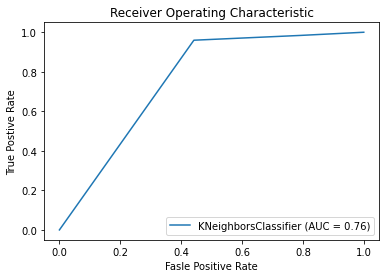

In [237]:
plot_roc_curve(final_model,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

Saving the Model

In [238]:
import joblib
joblib.dump(final_model,'Fraud_Insurance.obj')

['Fraud_Insurance.obj']

In [239]:
Fraud_Insurance = joblib.load('Fraud_Insurance.obj')

In [240]:
accuracy_score(Fraud_Insurance.predict(x_test),y_test)

0.7585513078470825

Result

In [241]:
Result= pd.DataFrame((Fraud_Insurance.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
Result

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,496
Predicted,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Actual,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
